In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.3'

In [2]:
%matplotlib inline

In [3]:
arr = np.random.randint(0, 20, size=(10, 2))
arr[:6]

array([[12,  0],
       [ 1, 17],
       [13,  5],
       [12,  8],
       [13, 17],
       [ 7,  6]])

In [4]:
arr_m = arr + np.array([4, 5])
arr_m[:6]

array([[16,  5],
       [ 5, 22],
       [17, 10],
       [16, 13],
       [17, 22],
       [11, 11]])

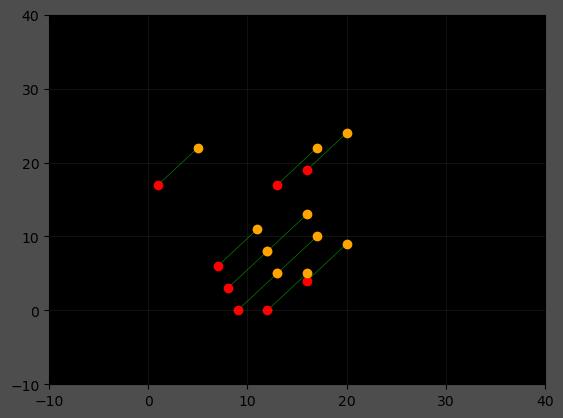

In [5]:
plt.axes().set_facecolor('black')
plt.scatter(arr[:, 0], arr[:, 1], c='red')
plt.scatter(arr_m[:, 0], arr_m[:, 1], c='orange')
for i in range(len(arr)):
    plt.plot([arr[i, 0], arr_m[i, 0]], [arr[i, 1], arr_m[i, 1]],c='green',linewidth=.5, zorder=0)

plt.xlim(-10,40)
plt.ylim(-10,40)
plt.grid(alpha=0.1)
plt.show()

In [6]:
arr2 = np.random.randint(0, 10, size=(20, 3))
arr_m2 = arr2 + np.array([8, 8, 8])
arr2.shape

(20, 3)

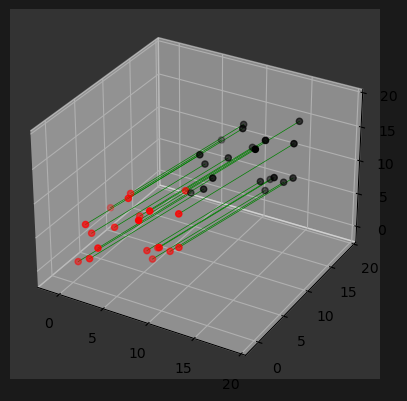

In [7]:
fig = plt.figure()
fig.patch.set_facecolor('0.1')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('0.2')

ax.scatter(arr2[:,0], arr2[:,1], arr2[:,2], c='red')
ax.scatter(arr_m2[:,0], arr_m2[:,1], arr_m2[:,2], c='black')
for i in range(len(arr2)):
    plt.plot([arr2[i, 0], arr_m2[i, 0]], [arr2[i, 1], arr_m2[i, 1]], [arr2[i, 2], arr_m2[i, 2]],c='g',linewidth=.5, zorder=0)

ax.set_xlim(-2, 20)
ax.set_ylim(-2, 20)
ax.set_zlim(-2, 20)
plt.show()    

In [8]:
def _2d_transform(v, M):
    
    v_t = M @ v
    
    plt.figure(figsize=(6,6))
    plt.axes().set_facecolor('0.1')
    plt.scatter(v[0, :], v[1, :], c='red', zorder=2, s=80, alpha=.2)
    plt.scatter(v_t[0, :], v_t[1, :], c='yellow', zorder=2, alpha=.5)
    for i in range(v.shape[1]):
        plt.plot([v[0, i], v_t[0, i]], [v[1, i], v_t[1, i]],c='green',linewidth=.5, zorder=1)

    plt.axhline(y=0, color='black',zorder=0)
    plt.axvline(x=0, color='black',zorder=0)
    #plt.xlim(v_t[0, :].min()-2, v_t[0, :].max()+2)
    #plt.ylim(v_t[1, :].min()-2, v_t[1, :].max()+2)
    plt.grid(alpha=.1)
    plt.show()    

In [9]:
M1 = np.array([[ 2, .5],
               [ .5, 2]])


basis = np.array([[ 1, 0],
                  [ 0, 1]])


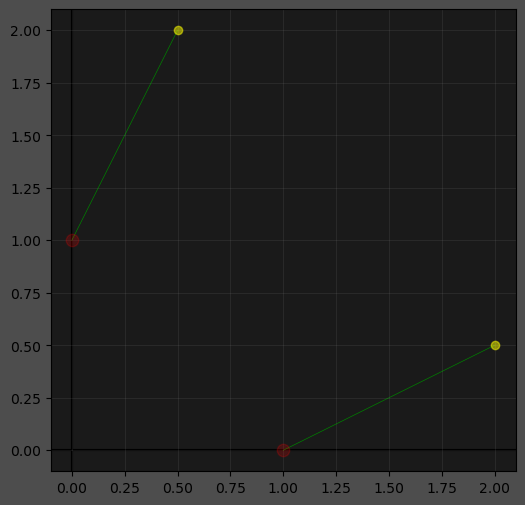

In [10]:
_2d_transform(basis, M1)

In [11]:
x = np.arange(-40, 41, 4)
y = np.arange(-40, 41, 4)
X, Y = np.meshgrid(x, y)
coordinates = np.column_stack((X.ravel(), Y.ravel()))
v = coordinates.T    
#v_t = M @ v
v.shape

(2, 441)

In [12]:
def _2d_lin_trans(M,xylim=50):
    
    x = np.arange(-40, 41, 4)
    y = np.arange(-40, 41, 4)
    X, Y = np.meshgrid(x, y)
    coordinates = np.column_stack((X.ravel(), Y.ravel()))
    v = coordinates.T    
    v_t = M @ v
    
    
    plt.figure(figsize=(6,6))
    plt.axes().set_facecolor('black')
    plt.scatter(v[0, :], v[1, :], c='red', zorder=2, s=30, alpha=.2)
    plt.scatter(v_t[0, :], v_t[1, :], c='orange', zorder=2, alpha=.5)
    for i in range(v.shape[1]):
        plt.plot([v[0, i], v_t[0, i]], [v[1, i], v_t[1, i]],c='green',linewidth=.5, zorder=1)

    plt.axhline(y=0, color='black',zorder=0)
    plt.axvline(x=0, color='black',zorder=0)
    plt.xlim(-xylim, xylim)
    plt.ylim(-xylim, xylim)
    plt.grid(alpha=.3)
    plt.show()    

In [13]:
def _3d_lin_trans(M, xyzlim=50):
    
    x = np.arange(-20, 21, 10)
    y = np.arange(-20, 21, 10)
    z = np.arange(-20, 21, 10)

    X, Y, Z = np.meshgrid(x, y, z)
    coordinates = np.column_stack((X.ravel(), Y.ravel(), Z.ravel()))
    v = coordinates.T    
    v_t = M @ v
        
    fig = plt.figure()
    fig.patch.set_facecolor('.1')
    ax = fig.add_subplot(111, projection='3d')
    ax.set_facecolor('.1')
    ax.scatter(v[0,:], v[1,:], v[2,:], c='red',alpha=.5, s=50)
    ax.scatter(v_t[0,:], v_t[1,:], v_t[2,:], c='black',alpha=.3,s=50)
    for i in range(v.shape[1]):
        plt.plot([v[0, i], v_t[0, i]], [v[1, i], v_t[1, i]], [v[2, i], v_t[2, i]],c='g',linewidth=.5, zorder=0)
    ax.set_xlim(-xyzlim, xyzlim)
    ax.set_ylim(-xyzlim, xyzlim)
    ax.set_zlim(-xyzlim, xyzlim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()    

In [14]:
def _2d_T_M(a,b,c,d):
    return np.array([[a,b],[c,d]])
def _3d_T_M(x1,y1,z1,x2,y2,z2,x3,y3,z3):
    return np.array([[x1,y1,z1],[x2,y2,z2],[x3,y3,z3]])

In [21]:
M4 = _2d_T_M(0,-1, 1, 0)
M4

array([[ 0, -1],
       [ 1,  0]])

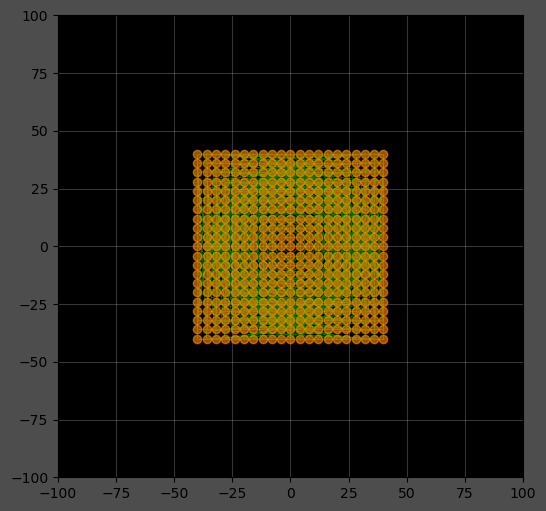

In [22]:
_2d_lin_trans(M4,xylim=100)

In [17]:
M5 = _3d_T_M(1,0,1,0,1,1,0,0,1)
M5

array([[1, 0, 1],
       [0, 1, 1],
       [0, 0, 1]])

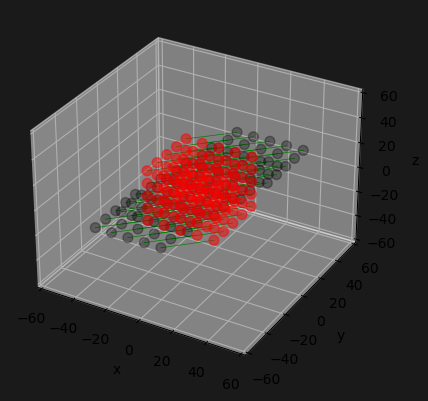

In [18]:
_3d_lin_trans(M5,xyzlim=60)

In [19]:
%matplotlib inline
#%matplotlib notebook